In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)  # 展示所有列

file = 'data.csv'
raw_data = pd.read_csv(file)
raw_data.head()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [106]:
# 创建数据副本
data = raw_data.copy()

# 修改Attrition列，离职的设为1，否则为0
data.loc[data["Attrition"] == "Yes", "Attrition"] = 1
data.loc[data["Attrition"] == "No", "Attrition"] = 0

# 修改BusinessTravel列，分为三档0,1,2
data.loc[data["BusinessTravel"] == "Non-Travel", "BusinessTravel"] = 0
data.loc[data["BusinessTravel"] == "Travel_Rarely", "BusinessTravel"] = 1
data.loc[data["BusinessTravel"] == "Travel_Frequently", "BusinessTravel"] = 2

# 修改Gender列，男性设为1，女性为0
data.loc[data["Gender"] == "Male", "Gender"] = 1
data.loc[data["Gender"] == "Female", "Gender"] = 0

# 修改OverTime列，yes设为1，no设为0
data.loc[data["OverTime"] == "Yes", "OverTime"] = 1
data.loc[data["OverTime"] == "No", "OverTime"] = 0

# 删除Over18、EmployeeCount和StandardHours列，因为每列只有一个值
data = data.drop(["Over18", "EmployeeCount", "StandardHours"], axis=1)

data = data.infer_objects()  # 自动修正每列数据类型
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [107]:
# 将类别变量one hot之后加入dataframe，得到data_with_one_hot
category_columns = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
data_with_one_hot = data.join(pd.get_dummies(data[category_columns]))
data_with_one_hot = data_with_one_hot.drop(columns=category_columns)  # 删除原来的类别变量列
data_with_one_hot

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,1,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,2,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,4,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,4,5,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,7,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,23,2,2061,3,1,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,1,613,6,1,2062,4,1,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,1,155,4,3,2064,2,1,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,2,1023,2,3,2065,4,1,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


# 样本的不平衡性

分为上采样部分和下采样部分，测试模型是随机森林，使用默认参数

## 不做上采样

In [108]:
X = data_with_one_hot.drop(columns='Attrition')
y = data_with_one_hot['Attrition']

# 随机森林
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_jobs=-1, random_state=0)

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']

scores = cross_validate(rf_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean()) 

fit_time : [0.2170012  0.22399974 0.21899939 0.23495388 0.22599983] 	average: 0.2241908073425293
score_time : [0.12100101 0.10900903 0.11704707 0.1170001  0.12304544] 	average: 0.11742053031921387
test_f1_weighted : [0.77966318 0.81299568 0.81620284 0.8005158  0.83238903] 	average: 0.8083533042979948


## 上采样：SMOTE

In [109]:
# SMOTE上采样
from imblearn.over_sampling import SMOTE

oversampler = SMOTE()
X, y = oversampler.fit_resample(data_with_one_hot.drop(columns=["Attrition"]), data["Attrition"])

# 随机森林
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_jobs=-1, random_state=0)

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']


scores = cross_validate(rf_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean()) 

fit_time : [0.24299836 0.2369988  0.24895501 0.23800087 0.2679565 ] 	average: 0.24698190689086913
score_time : [0.12200212 0.11099958 0.11600089 0.11100101 0.11199903] 	average: 0.11440052986145019
test_f1_weighted : [0.93110181 0.93096632 0.91277173 0.91452169 0.90857916] 	average: 0.9195881435707861


## 上采样：ADASYN

In [110]:
# ADASYN
from imblearn.over_sampling import ADASYN

oversampler = ADASYN(random_state=0)
X, y = oversampler.fit_resample(data_with_one_hot.drop(columns=["Attrition"]), data["Attrition"])

# 随机森林
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_jobs=-1, random_state=0)

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']

print("no scale:")
scores = cross_validate(rf_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean()) 

no scale:
fit_time : [0.30699825 0.25303936 0.2529974  0.2380054  0.26399779] 	average: 0.26300764083862305
score_time : [0.12131143 0.11276984 0.11400104 0.11199522 0.11900377] 	average: 0.11581625938415527
test_f1_weighted : [0.91700244 0.92915386 0.90827775 0.93957552 0.92287388] 	average: 0.9233766891467742


## 上采样：随机上采样

In [111]:
# RandomOverSampler 从少数类的样本中随机采样
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=0)
X, y = oversampler.fit_resample(data_with_one_hot.drop(columns=["Attrition"]), data["Attrition"])

# 随机森林
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_jobs=-1, random_state=0)

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']

scores = cross_validate(rf_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean()) 

fit_time : [0.2619977  0.22696829 0.2549994  0.23700047 0.24796104] 	average: 0.24578537940979003
score_time : [0.11303115 0.12300158 0.10799813 0.11339974 0.11637616] 	average: 0.1147613525390625
test_f1_weighted : [0.98785405 0.97768487 0.96551554 0.98985718 0.97971352] 	average: 0.980125032187973


## 下采样：随机下采样

In [112]:
# RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
oversampler = RandomUnderSampler(random_state=0)
X, y = oversampler.fit_resample(data_with_one_hot.drop(columns=["Attrition"]), data["Attrition"])

# 随机森林
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_jobs=-1, random_state=0)

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']


scores = cross_validate(rf_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean()) 

fit_time : [0.22299814 0.20796466 0.20099926 0.20195866 0.20799828] 	average: 0.20838379859924316
score_time : [0.12167525 0.11007786 0.11529446 0.11500168 0.10858202] 	average: 0.11412625312805176
test_f1_weighted : [0.67368421 0.69405916 0.76210526 0.65263158 0.765     ] 	average: 0.7094960419697263


可以看出，随机下采样使得模型效果下降很多，最好的解决不平衡的方法还是进行随机上采样

# 尝试不同模型

注意这部分和上面部分没有关系，在这部分使用的数据集仍然是原数据集，而不是进行不平衡调整后的数据集

至于模型和处理数据不平衡方法的结合，放在之后再说

In [113]:
# 定义训练数据，注意是原数据
X = data_with_one_hot.drop(columns='Attrition')
y = data_with_one_hot['Attrition']

首先试一下线性SVM，并考虑不做标准化、StandardScaler标准化和MinMaxScaler三种情况

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier

# linear SVM
non_lin_clf = LinearSVC(random_state=42, tol=1e-5,class_weight='balanced', max_iter=10000)
lin_clf = Pipeline([('scaler', StandardScaler()), ('linearsvc', LinearSVC(random_state=0, tol=1e-5,class_weight='balanced', max_iter=10000))])
min_lin_clf = Pipeline([('scaler', MinMaxScaler()), ('linearsvc', LinearSVC(random_state=0, tol=1e-5,class_weight='balanced', max_iter=10000))])

# cross validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
scoring = ['f1_weighted']

print("\nno scale:")
scores = cross_validate(non_lin_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean())
print("std:")
scores = cross_validate(lin_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean()) 
print("\nminmax:")
scores = cross_validate(min_lin_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean())   


std:
fit_time : [0.02599859 0.01599956 0.01999736 0.01699853 0.02000022] 	average: 0.019798851013183592
score_time : [0.00400019 0.00400019 0.00500011 0.00400305 0.00500035] 	average: 0.004400777816772461
test_f1_weighted : [0.79401637 0.78849985 0.83310286 0.8002318  0.8757149 ] 	average: 0.818313155416187

minmax:
fit_time : [0.02199984 0.01900005 0.02099252 0.01999831 0.01799989] 	average: 0.01999812126159668
score_time : [0.00400019 0.00399852 0.00601459 0.00500154 0.00299978] 	average: 0.004402923583984375
test_f1_weighted : [0.81659539 0.74467021 0.84370826 0.8437738  0.8401288 ] 	average: 0.8177752930227525

no scale:
fit_time : [0.01599979 0.02299857 0.01604223 0.02000141 0.01300859] 	average: 0.01761012077331543
score_time : [0.0030005  0.00299931 0.00396013 0.00303674 0.00494981] 	average: 0.003589296340942383
test_f1_weighted : [0.75768884 0.44644474 0.76714826 0.76791377 0.7734025 ] 	average: 0.7025196205460997


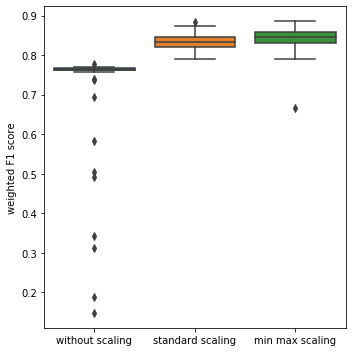

In [115]:
# 箱型图比较标准化的作用
sgd_clf = SGDClassifier(n_jobs=-1, random_state=None)  # 不固定种子
pipeline_std = Pipeline([('StandardScaler', StandardScaler()), ('SGDClassifier', sgd_clf)])
pipeline_minmax = Pipeline([('MinMaxScaler', MinMaxScaler()), ('SGDClassifier', sgd_clf)])

# 分别做十次五折交叉检验，记录得到的f1_weighted
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)  # 不固定种子
scoring = ['f1_weighted']
no_scale_score = []
std_score = []
minmax_score = []
for i in range(10):
    no_scale_score += list(cross_validate(sgd_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)['test_f1_weighted'])
    std_score += list(cross_validate(pipeline_std, X, y, scoring=scoring, cv=cv, return_train_score=False)['test_f1_weighted'])
    minmax_score += list(cross_validate(pipeline_minmax, X, y, scoring=scoring, cv=cv, return_train_score=False)['test_f1_weighted'])
    
# 画出箱型图
df_score = pd.DataFrame(np.array([no_scale_score, std_score, minmax_score]).T, 
                        columns = ['without scaling', 'standard scaling', 'min max scaling'])

plt.figure(figsize=(5, 5))
plt.ylabel('weighted F1 score')
sns.boxplot(data = df_score)
plt.tight_layout()
plt.savefig('fig1.eps', dpi=400, format='eps', bbox_inches = 'tight');

可以看出对于线性SVM，标准化很重要（可以看到不做标准化的话，效果有可能会非常差），两种标准化效果差不多

接下来试一下带RBF核的SVM，同样考虑不做标准化、StandardScaler标准化和MinMaxScaler三种情况

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC


# SVM-RBF
svm_clf = SVC(random_state=0)
pipeline_std = Pipeline([('StandardScaler', StandardScaler()), ('SVC-RBF', svm_clf)])
pipeline_minmax = Pipeline([('MinMaxScaler', MinMaxScaler()), ('SVC-RBF', svm_clf)])

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']

print("std:")
scores = cross_validate(pipeline_std, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean()) 
print("\nminmax:")
scores = cross_validate(pipeline_minmax, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean())   
print("\nno scale:")
scores = cross_validate(svm_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean()) 

std:
fit_time : [0.06899953 0.05898356 0.0650382  0.05794907 0.06500506] 	average: 0.0631950855255127
score_time : [0.02700114 0.02800179 0.0289619  0.02504086 0.02899241] 	average: 0.027599620819091796
test_f1_weighted : [0.8025165  0.83948565 0.84967597 0.79603984 0.84098446] 	average: 0.8257404841476325

minmax:
fit_time : [0.0570004  0.05199838 0.05799127 0.05399847 0.06299758] 	average: 0.056797218322753903
score_time : [0.02500081 0.02404213 0.02600074 0.02400351 0.0260005 ] 	average: 0.025009536743164064
test_f1_weighted : [0.79802458 0.84514415 0.85235726 0.8005158  0.85247827] 	average: 0.8297040118107943

no scale:
fit_time : [0.07300496 0.06299901 0.06500101 0.05099893 0.05799723] 	average: 0.0620002269744873
score_time : [0.02899647 0.02601242 0.02999735 0.02500391 0.02603483] 	average: 0.027208995819091798
test_f1_weighted : [0.76235828 0.76235828 0.76714826 0.76714826 0.76714826] 	average: 0.7652322691245322


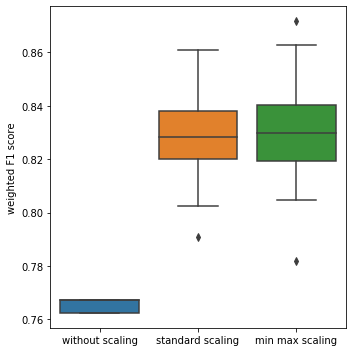

In [117]:
# 箱型图比较标准化的作用
svm_clf = SVC(random_state=None)  # 不固定种子
pipeline_std = Pipeline([('StandardScaler', StandardScaler()), ('SVC-RBF', svm_clf)])
pipeline_minmax = Pipeline([('MinMaxScaler', MinMaxScaler()), ('SVC-RBF', svm_clf)])

# 分别做十次五折交叉检验，记录得到的f1_weighted
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)  # 不固定种子
scoring = ['f1_weighted']
no_scale_score = []
std_score = []
minmax_score = []
for i in range(10):
    no_scale_score += list(cross_validate(svm_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)['test_f1_weighted'])
    std_score += list(cross_validate(pipeline_std, X, y, scoring=scoring, cv=cv, return_train_score=False)['test_f1_weighted'])
    minmax_score += list(cross_validate(pipeline_minmax, X, y, scoring=scoring, cv=cv, return_train_score=False)['test_f1_weighted'])
    
# 画出箱型图
df_score = pd.DataFrame(np.array([no_scale_score, std_score, minmax_score]).T, 
                        columns = ['without scaling', 'standard scaling', 'min max scaling'])

plt.figure(figsize=(5, 5))
plt.ylabel('weighted F1 score')
sns.boxplot(data = df_score)
plt.tight_layout()
plt.savefig('fig1.eps', dpi=400, format='eps', bbox_inches = 'tight');

再试一下随机森林，随机森林其实无所谓标准化，但是我们在这里也试一下。并且可以从结果看出，做不做标准化是无所谓的，与我们的认知相符

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier


# 随机森林
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=0)
pipeline_std = Pipeline([('StandardScaler', StandardScaler()), ('RandomForestClassifier', rf_clf)])
pipeline_minmax = Pipeline([('MinMaxScaler', MinMaxScaler()), ('RandomForestClassifier', rf_clf)])

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']

print("std:")
scores = cross_validate(pipeline_std, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean()) 
print("\nminmax:")
scores = cross_validate(pipeline_minmax, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean()) 
print("\nno scale:")
scores = cross_validate(rf_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean())  

std:
fit_time : [0.42399788 0.21299744 0.21200061 0.21599936 0.21798611] 	average: 0.2565962791442871
score_time : [0.12228727 0.12061691 0.12104297 0.11600542 0.11500072] 	average: 0.11899065971374512
test_f1_weighted : [0.78171002 0.81299568 0.81620284 0.8005158  0.83238903] 	average: 0.8087626740450073

minmax:
fit_time : [0.22499943 0.22000027 0.21796727 0.20897436 0.20797205] 	average: 0.21598267555236816
score_time : [0.11805677 0.11404133 0.11470151 0.10903001 0.11101532] 	average: 0.11336898803710938
test_f1_weighted : [0.77966318 0.81299568 0.81620284 0.8005158  0.83238903] 	average: 0.8083533042979948

no scale:
fit_time : [0.24994063 0.23900127 0.20499635 0.21095943 0.21399784] 	average: 0.2237791061401367
score_time : [0.11071587 0.12177277 0.11400867 0.10800266 0.11942363] 	average: 0.11478471755981445
test_f1_weighted : [0.77966318 0.81299568 0.81620284 0.8005158  0.83238903] 	average: 0.8083533042979948


接下来试一下GradientBoostingClassifier，其实这个方法也不需要标准化

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier


# GradientBoosting
gb_clf = GradientBoostingClassifier(random_state=0)
pipeline_std = Pipeline([('StandardScaler', StandardScaler()), ('GradientBoostingClassifier', gb_clf)])
pipeline_minmax = Pipeline([('MinMaxScaler', MinMaxScaler()), ('GradientBoostingClassifier', gb_clf)])

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']

print("std:")
scores = cross_validate(pipeline_std, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean()) 
print("\nminmax:")
scores = cross_validate(pipeline_minmax, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean())    
print("\nno scale:")
scores = cross_validate(gb_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean())  

std:
fit_time : [0.54396129 0.52399993 0.52803516 0.49400377 0.49095511] 	average: 0.516191053390503
score_time : [0.00399995 0.00399995 0.00399852 0.00600719 0.00403738] 	average: 0.004408597946166992
test_f1_weighted : [0.82369208 0.84209282 0.83595251 0.81032921 0.85769616] 	average: 0.8339525568084781

minmax:
fit_time : [0.52699852 0.54199982 0.48805451 0.4939642  0.52099705] 	average: 0.5144028186798095
score_time : [0.00500131 0.00399375 0.00598001 0.00600052 0.00404191] 	average: 0.005003499984741211
test_f1_weighted : [0.82369208 0.84209282 0.83595251 0.81032921 0.85769616] 	average: 0.8339525568084781

no scale:
fit_time : [0.48803592 0.48999977 0.48799777 0.51904178 0.52195764] 	average: 0.5014065742492676
score_time : [0.00396395 0.00404143 0.00396609 0.00401306 0.00400257] 	average: 0.003997421264648438
test_f1_weighted : [0.82369208 0.84209282 0.83595251 0.81032921 0.85769616] 	average: 0.8339525568084781


试一下KNeighbors，同样考虑不做标准化、StandardScaler标准化和MinMaxScaler三种情况

In [120]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 


# KNN
knn_clf = KNeighborsClassifier(n_jobs=-1)
pipeline_std = Pipeline([('StandardScaler', StandardScaler()), ('KNeighborsClassifier', knn_clf)])
pipeline_minmax = Pipeline([('MinMaxScaler', MinMaxScaler()), ('KNeighborsClassifier', knn_clf)])

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']

print("std:")
scores = cross_validate(pipeline_std, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean()) 
print("\nminmax:")
scores = cross_validate(pipeline_minmax, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean())   
print("\nno scale:")
scores = cross_validate(knn_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean()) 

std:
fit_time : [0.01199508 0.0079987  0.00900102 0.00699973 0.00699997] 	average: 0.008598899841308594
score_time : [0.12699676 0.12299919 0.13199925 0.11900067 0.12100053] 	average: 0.12439928054809571
test_f1_weighted : [0.77609771 0.80667879 0.8018994  0.79161101 0.80424397] 	average: 0.7961061762826386

minmax:
fit_time : [0.00599933 0.00599766 0.0070014  0.00600052 0.00600123] 	average: 0.006200027465820312
score_time : [0.131001   0.13499928 0.12000155 0.12000084 0.12501001] 	average: 0.12620253562927247
test_f1_weighted : [0.79332096 0.82579062 0.81703792 0.77451395 0.81032921] 	average: 0.8041985331479772

no scale:
fit_time : [0.00399828 0.00400066 0.00299954 0.00500202 0.00400019] 	average: 0.004000139236450195
score_time : [0.13099599 0.13500023 0.12600088 0.1359973  0.12299943] 	average: 0.13019876480102538
test_f1_weighted : [0.76748609 0.76854574 0.76168831 0.7822916  0.78503977] 	average: 0.7730103013017545


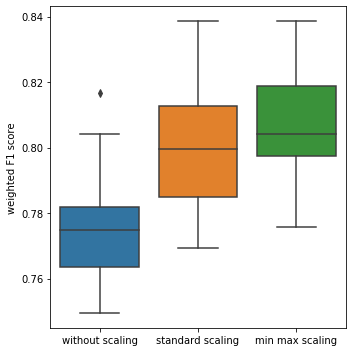

In [121]:
# 箱型图比较标准化的作用
knn_clf = KNeighborsClassifier(n_jobs=-1)
pipeline_std = Pipeline([('StandardScaler', StandardScaler()), ('KNeighborsClassifier', knn_clf)])
pipeline_minmax = Pipeline([('MinMaxScaler', MinMaxScaler()), ('KNeighborsClassifier', knn_clf)])

# 分别做十次五折交叉检验，记录得到的f1_weighted
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)  # 不固定种子
scoring = ['f1_weighted']
no_scale_score = []
std_score = []
minmax_score = []
for i in range(10):
    no_scale_score += list(cross_validate(knn_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)['test_f1_weighted'])
    std_score += list(cross_validate(pipeline_std, X, y, scoring=scoring, cv=cv, return_train_score=False)['test_f1_weighted'])
    minmax_score += list(cross_validate(pipeline_minmax, X, y, scoring=scoring, cv=cv, return_train_score=False)['test_f1_weighted'])
    
# 画出箱型图
df_score = pd.DataFrame(np.array([no_scale_score, std_score, minmax_score]).T, 
                        columns = ['without scaling', 'standard scaling', 'min max scaling'])

plt.figure(figsize=(5, 5))
plt.ylabel('weighted F1 score')
sns.boxplot(data = df_score)
plt.tight_layout()
plt.savefig('fig1.eps', dpi=400, format='eps', bbox_inches = 'tight');

可以看出对于KNN，标准化有一些作用，但不是特别大

## 当前阶段各模型效果对比

由于SVM无法输出预测概率，所以无法计算ROC曲线

Random Forest
Gradient Boosting
K Nearest Neighbor


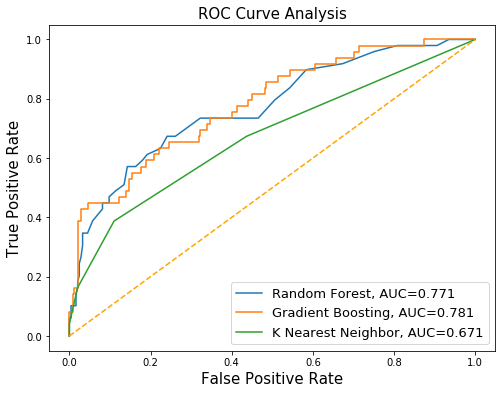

In [122]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# 划分训练集和验证集
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=0)


# 线性SVM选择StandardScaler的版本
#sgd_clf = Pipeline([('StandardScaler', StandardScaler()), ('SGDClassifier', SGDClassifier(n_jobs=-1, random_state=0))])

# RBF核SVM选择StandardScaler的版本
#svm_clf = Pipeline([('StandardScaler', StandardScaler()), ('SVC-RBF', SVC(random_state=0) )])

# 随机森林直接用
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=0)
rf_clf.fit(X_train, y_train)

# GradientBoosting也直接用
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)

# KNN选择StandardScaler的版本
knn_clf = Pipeline([('StandardScaler', StandardScaler()), ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1))])
knn_clf.fit(X_train, y_train)

# ("Linear SVM", sgd_clf), ("RBF SVM", svm_clf), 
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
models = [("Random Forest", rf_clf), ("Gradient Boosting", gb_clf), ("K Nearest Neighbor", knn_clf)]
for model_name, model in models:
        #print(model_name)
        yproba = model.predict_proba(X_validation)[::,1]

        fpr, tpr, _ = roc_curve(y_validation,  yproba)
        auc = roc_auc_score(y_validation, yproba)
        result_table = result_table.append({'classifiers':model_name,
                                            'fpr':fpr, 
                                            'tpr':tpr, 
                                            'auc':auc}, ignore_index=True)

    # Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis',fontsize=15)
plt.legend(prop={'size':13}, loc='lower right');

# 处理不平衡方法与模型的结合

RandomOverSampler + 随机森林

In [123]:
# RandomOverSampler 从少数类的样本中随机采样
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=0)
X, y = oversampler.fit_resample(data_with_one_hot.drop(columns=["Attrition"]), data["Attrition"])

# 随机森林
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_jobs=-1, random_state=0)

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']

scores = cross_validate(rf_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean())  

fit_time : [0.27700591 0.22895813 0.22599769 0.22899985 0.23203421] 	average: 0.23859915733337403
score_time : [0.11501503 0.1186173  0.10844684 0.12100554 0.11824393] 	average: 0.11626572608947754
test_f1_weighted : [0.98785405 0.97768487 0.96551554 0.98985718 0.97971352] 	average: 0.980125032187973


RandomOverSampler + GradientBoosting

In [124]:
# RandomOverSampler 从少数类的样本中随机采样
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=0)
X, y = oversampler.fit_resample(data_with_one_hot.drop(columns=["Attrition"]), data["Attrition"])

# GradientBoosting
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

gb_clf = GradientBoostingClassifier(random_state=0)

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']

scores = cross_validate(gb_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean())  

fit_time : [0.73903608 0.7369988  0.73299813 0.7309866  0.73104739] 	average: 0.734213399887085
score_time : [0.00396156 0.00400019 0.00601482 0.00599957 0.00599551] 	average: 0.005194330215454101
test_f1_weighted : [0.89258534 0.90038225 0.88423558 0.88836649 0.88428136] 	average: 0.8899702043473103


SMOTE + GradientBoosting

In [125]:
# SMOTE上采样
from imblearn.over_sampling import SMOTE

oversampler = SMOTE()
X, y = oversampler.fit_resample(data_with_one_hot.drop(columns=["Attrition"]), data["Attrition"])

# GradientBoosting
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

gb_clf = GradientBoostingClassifier(random_state=0)

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']

scores = cross_validate(gb_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean())  

fit_time : [0.79604244 0.80400777 0.79404402 0.78700042 0.76305056] 	average: 0.7888290405273437
score_time : [0.0039587  0.00503159 0.00498605 0.00600052 0.0049932 ] 	average: 0.004994010925292969
test_f1_weighted : [0.93309942 0.92085668 0.9106623  0.910596   0.89828631] 	average: 0.914700139283678


ADASYN + GradientBoosting

In [126]:
# ADASYN
from imblearn.over_sampling import ADASYN

oversampler = ADASYN(random_state=0)
X, y = oversampler.fit_resample(data_with_one_hot.drop(columns=["Attrition"]), data["Attrition"])

# GradientBoosting
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

gb_clf = GradientBoostingClassifier(random_state=0)

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']

scores = cross_validate(gb_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean())  

fit_time : [0.74303889 0.75599909 0.74399877 0.7489655  0.75799847] 	average: 0.7500001430511475
score_time : [0.00496507 0.0040381  0.00496411 0.00403643 0.00599194] 	average: 0.0047991275787353516
test_f1_weighted : [0.90870268 0.93132102 0.9082355  0.91036694 0.89319323] 	average: 0.9103638746482907


RandomUnderSampler + 线性SVM

In [127]:
# RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
oversampler = RandomUnderSampler(random_state=0)
X, y = oversampler.fit_resample(data_with_one_hot.drop(columns=["Attrition"]), data["Attrition"])

# 线性SVM
sgd_clf = SGDClassifier(n_jobs=-1, random_state=0)
pipeline_std = Pipeline([('StandardScaler', StandardScaler()), ('SGDClassifier', sgd_clf)])
pipeline_minmax = Pipeline([('MinMaxScaler', MinMaxScaler()), ('SGDClassifier', sgd_clf)])

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']

print("std:")
scores = cross_validate(pipeline_std, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean()) 
print("\nminmax:")
scores = cross_validate(pipeline_minmax, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean())    
print("\nno scale:")
scores = cross_validate(sgd_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value, "\taverage:", value.mean())  

std:
fit_time : [0.01099586 0.01200175 0.01299334 0.01200581 0.01099944] 	average: 0.011799240112304687
score_time : [0.00497484 0.00596213 0.00499892 0.00399423 0.00400233] 	average: 0.004786491394042969
test_f1_weighted : [0.69453381 0.75789474 0.67215954 0.68844418 0.73401245] 	average: 0.7094089433156789

minmax:
fit_time : [0.01499629 0.01400733 0.00999403 0.00898242 0.01000047] 	average: 0.011596107482910156
score_time : [0.00400114 0.00599813 0.00700617 0.00700641 0.00399971] 	average: 0.005602312088012695
test_f1_weighted : [0.68526808 0.74618632 0.6299369  0.67174515 0.81896454] 	average: 0.7104201981698034

no scale:
fit_time : [0.01398182 0.0079999  0.00999761 0.00800061 0.00699973] 	average: 0.009395933151245118
score_time : [0.00299907 0.00600123 0.00400114 0.00199938 0.00300002] 	average: 0.0036001682281494142
test_f1_weighted : [0.54248421 0.38220921 0.33446998 0.47850184 0.51794872] 	average: 0.45112279054885934


差不多就尝试了这几种组合，我们差不多可以认为RandomOverSampler + 随机森林是效果最好的了

# 调参

我们只对已知的最好模型RandomOverSampler + 随机森林进行调参

网格搜索

In [128]:
from sklearn.model_selection import GridSearchCV

# RandomOverSampler上采样
oversampler = RandomOverSampler(random_state=0)
X, y = oversampler.fit_resample(data_with_one_hot.drop(columns=["Attrition"]), data["Attrition"])

# 随机森林
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=0)


parameters = {
    'n_estimators': [100,200],
    'min_samples_split':[2,4],
    'max_depth': [None, 1, 5],
    'max_features': ['sqrt', 'auto','log2']
}
#scoring = ['f1_weighted']
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid_search = GridSearchCV(rf_clf, parameters, cv=cv, scoring='f1_weighted', n_jobs=-1, verbose=4)
grid_search.fit(X, y)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
RandomForestClassifier(max_features='log2', n_estimators=200, n_jobs=-1,
                       random_state=0)
0.9821523260747996


随机搜索

In [129]:
from sklearn.model_selection import RandomizedSearchCV

# RandomOverSampler上采样
oversampler = RandomOverSampler(random_state=0)
X, y = oversampler.fit_resample(data_with_one_hot.drop(columns=["Attrition"]), data["Attrition"])

# 随机森林
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=0)


parameters = {
    'n_estimators': [100, 200, 500],
    'min_samples_split':list(range(2, 10)),
    'max_depth': [None] + list(range(1, 20)),
    'max_features': ['sqrt', 'auto','log2']
}
#scoring = ['f1_weighted']
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid_search = RandomizedSearchCV(rf_clf, parameters, n_iter = 50, cv=cv, scoring='f1_weighted', n_jobs=-1, verbose=4)
grid_search.fit(X, y)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
RandomForestClassifier(max_depth=18, max_features='log2', min_samples_split=4,
                       n_jobs=-1, random_state=0)
0.9821516449735528


# 最终的随机森林模型给出的feature importance

In [133]:
# 用上面调参得到的最优模型

sorted(zip(grid_search.best_estimator_.feature_importances_, data_with_one_hot.columns), reverse=True)

[(0.06542156931946079, 'JobSatisfaction'),
 (0.057479698873176756, 'NumCompaniesWorked'),
 (0.0557593185630064, 'Age'),
 (0.048321177994188516, 'Education'),
 (0.043063891990951994, 'BusinessTravel'),
 (0.04098384520915279, 'WorkLifeBalance'),
 (0.04058657593610625, 'Gender'),
 (0.04017931073682803, 'MonthlyIncome'),
 (0.03814533618719018, 'StockOptionLevel'),
 (0.03747286561849198, 'RelationshipSatisfaction'),
 (0.03735742113692216, 'DailyRate'),
 (0.03512872404324776, 'YearsSinceLastPromotion'),
 (0.03187870913461086, 'JobInvolvement'),
 (0.030237315043947915, 'MonthlyRate'),
 (0.029589460446271133, 'OverTime'),
 (0.029503801047521434, 'YearsAtCompany'),
 (0.02832925573605941, 'JobLevel'),
 (0.026528412049310193, 'EmployeeNumber'),
 (0.02326724895419825, 'TotalWorkingYears'),
 (0.022945815848288538, 'PerformanceRating'),
 (0.022845617992760782, 'YearsInCurrentRole'),
 (0.01964792687824812, 'HourlyRate'),
 (0.019088997725168793, 'Attrition'),
 (0.018672281616189258, 'MaritalStatus_Mar

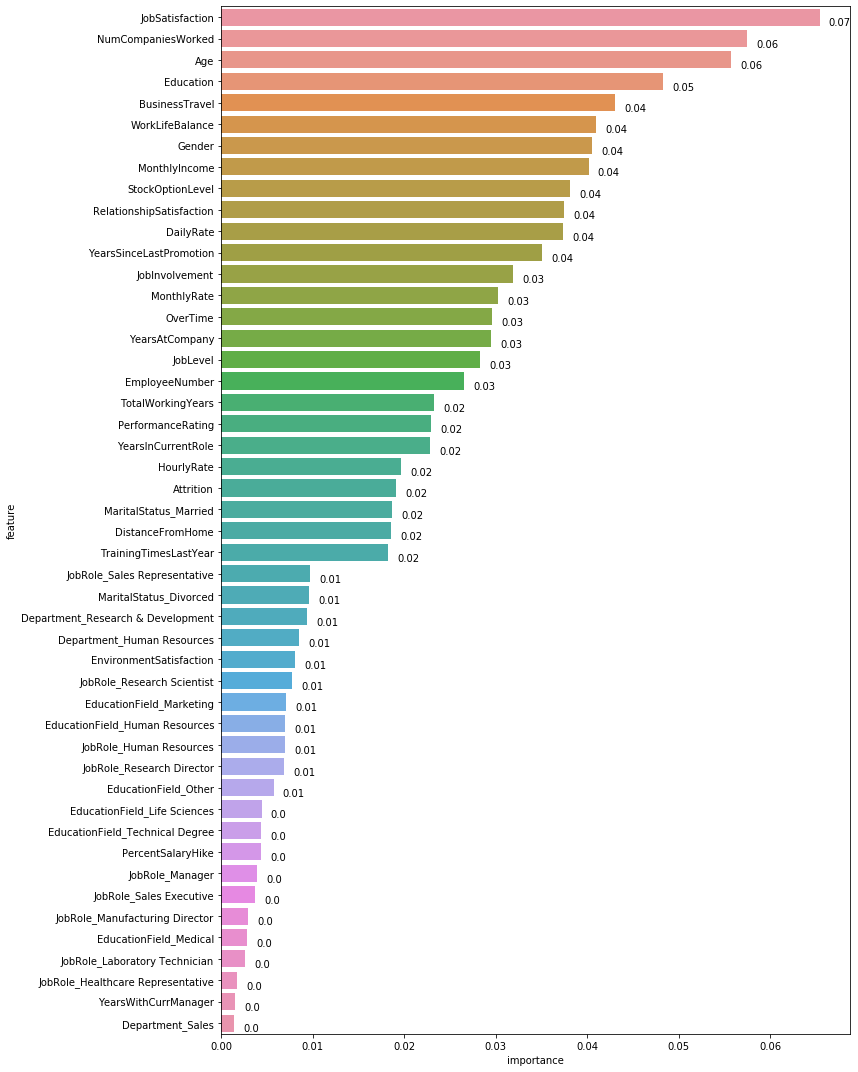

In [160]:
# 可视化
feature_importance = pd.DataFrame(sorted(zip(data_with_one_hot.columns, grid_search.best_estimator_.feature_importances_), reverse=True, key=lambda x: x[1]),
                                 columns=['feature', 'importance'])

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = round(p.get_width(), 2) 
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


plt.figure(figsize=(12, 15))
graph = sns.barplot(x = 'importance', y = 'feature', data = feature_importance, orient = 'h')
show_values_on_bars(graph, "h", 0.001)
plt.tight_layout()
plt.savefig('fig1.eps', dpi=400, format='eps', bbox_inches = 'tight');

# 以下是最开始写的草稿，可以忽略

先随便试一试模型，用上两种标准化方法做预处理

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier

# 线性SVM
sgd_clf = SGDClassifier(n_jobs=-1, random_state=0)
pipeline_std = Pipeline([('StandardScaler', StandardScaler()), ('SGDClassifier', sgd_clf)])
pipeline_minmax = Pipeline([('MinMaxScaler', MinMaxScaler()), ('SGDClassifier', sgd_clf)])

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']

print("std:")
scores = cross_validate(pipeline_std, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value)
print("\nminmax:")
scores = cross_validate(pipeline_minmax, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value)   
print("\nno scale:")
scores = cross_validate(sgd_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value) 

std:
fit_time : [0.16300941 0.04299378 0.03000474 0.03099799 0.02899837]
score_time : [0.02405    0.00399828 0.00999689 0.00600362 0.00500011]
test_f1_weighted : [0.79401637 0.78849985 0.83310286 0.8002318  0.8757149 ]

minmax:
fit_time : [0.0199914  0.0190177  0.01998234 0.01799726 0.0199945 ]
score_time : [0.00400257 0.00398159 0.00402308 0.00500345 0.00500107]
test_f1_weighted : [0.81659539 0.74467021 0.84370826 0.8437738  0.8401288 ]

no scale:
fit_time : [0.01699972 0.03099656 0.01796412 0.02395821 0.01695609]
score_time : [0.27857709 0.00903773 0.00304365 0.00504088 0.00404191]
test_f1_weighted : [0.75768884 0.44644474 0.76714826 0.76791377 0.7734025 ]


对于线性SVM，标准化很重要，两种标准化效果不相上下

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier


# 随机森林
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=0)
pipeline_std = Pipeline([('StandardScaler', StandardScaler()), ('RandomForestClassifier', rf_clf)])
pipeline_minmax = Pipeline([('MinMaxScaler', MinMaxScaler()), ('RandomForestClassifier', rf_clf)])

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']

print("std:")
scores = cross_validate(pipeline_std, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value)
print("\nminmax:")
scores = cross_validate(pipeline_minmax, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value)   
print("\nno scale:")
scores = cross_validate(rf_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value) 

std:
fit_time : [4.99348593 0.28299665 0.2639997  0.25901175 0.26205468]
score_time : [0.24000454 0.11999655 0.12200356 0.11398745 0.11461782]
test_f1_weighted : [0.78171002 0.81299568 0.81620284 0.8005158  0.83238903]

minmax:
fit_time : [0.29099965 0.36600161 0.29999971 0.28901553 0.33200002]
score_time : [0.11871624 0.12199926 0.11000013 0.11895275 0.12401152]
test_f1_weighted : [0.77966318 0.81299568 0.81620284 0.8005158  0.83238903]

no scale:
fit_time : [0.25899816 0.30100346 0.28095698 0.27672362 0.28100348]
score_time : [0.12599993 0.11803555 0.11200047 0.11100912 0.12099457]
test_f1_weighted : [0.77966318 0.81299568 0.81620284 0.8005158  0.83238903]


可以看出对于随机森林，标不标准化不重要

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC


# SVM-RBF
svm_clf = SVC(random_state=0)
pipeline_std = Pipeline([('StandardScaler', StandardScaler()), ('SVC-RBF', svm_clf)])
pipeline_minmax = Pipeline([('MinMaxScaler', MinMaxScaler()), ('SVC-RBF', svm_clf)])

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted', 'roc_auc']

print("std:")
scores = cross_validate(pipeline_std, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value)
print("\nminmax:")
scores = cross_validate(pipeline_minmax, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value)   
print("\nno scale:")
scores = cross_validate(svm_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value) 

std:
fit_time : [0.02198935 0.02401304 0.0279963  0.03500295 0.02498507]
score_time : [0.89495635 0.02804017 0.0239954  0.02600551 0.03699946]
test_f1_weighted : [0.69405916 0.77894737 0.74362321 0.66293373 0.76553288]
test_roc_auc : [0.83643617 0.85460993 0.76285461 0.74601064 0.86419194]

minmax:
fit_time : [0.023      0.01699972 0.02199936 0.01900411 0.01801062]
score_time : [0.01899958 0.01900077 0.02899075 0.02099633 0.01998591]
test_f1_weighted : [0.66966239 0.73684211 0.66270957 0.64210526 0.80711354]
test_roc_auc : [0.82890071 0.83643617 0.73492908 0.76551418 0.8533273 ]

no scale:
fit_time : [0.02402759 0.0200026  0.02299762 0.01698971 0.04099941]
score_time : [0.02597022 0.0340066  0.02900743 0.02200079 0.02899981]
test_f1_weighted : [0.55503418 0.56419896 0.54940656 0.54044321 0.65393465]
test_roc_auc : [0.65824468 0.6356383  0.64140071 0.59441489 0.66862834]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC


# SVM-RBF
svm_clf = SVC(random_state=0)
pipeline_std = Pipeline([('StandardScaler', StandardScaler()), ('SVC-RBF', svm_clf)])
pipeline_minmax = Pipeline([('MinMaxScaler', MinMaxScaler()), ('SVC-RBF', svm_clf)])

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']

print("std:")
scores = cross_validate(pipeline_std, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value)
print("\nminmax:")
scores = cross_validate(pipeline_minmax, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value)   
print("\nno scale:")
scores = cross_validate(svm_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value) 

对于RBF核的SVM，效果接近线性SVM

接下来尝试处理数据不平衡的情况

In [8]:
# SMOTE上采样
from imblearn.over_sampling import SMOTE

oversampler = SMOTE()
X, y = oversampler.fit_resample(data_with_one_hot.drop(columns=["Attrition"]), data["Attrition"])

# 随机森林
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_jobs=-1, random_state=0)

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']

print("no scale:")
scores = cross_validate(rf_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value) 

no scale:
fit_time : [0.30900145 0.44000077 0.31699848 0.34128284 0.29808664]
score_time : [0.12699652 0.11800146 0.11899638 0.12256908 0.11099839]
test_f1_weighted : [0.93919052 0.93914507 0.92088598 0.90436782 0.90454513]


好像SMOTE降低了效果，换一种方法：RandomOverSampler

In [9]:
# RandomOverSampler 从少数类的样本中随机采样
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=0)
X, y = oversampler.fit_resample(data_with_one_hot.drop(columns=["Attrition"]), data["Attrition"])

# 随机森林
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_jobs=-1, random_state=0)

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']

print("no scale:")
scores = cross_validate(rf_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value) 
    
    

no scale:
fit_time : [0.30199838 0.33299875 0.26300049 0.32700181 0.30199981]
score_time : [0.11300111 0.11800551 0.11601281 0.11000371 0.11400056]
test_f1_weighted : [0.98785405 0.97768487 0.96551554 0.98985718 0.97971352]


In [16]:
rf_clf.fit(X, y)
sorted(zip(rf_clf.feature_importances_, data_with_one_hot.columns), reverse=True)

[(0.07220653365634154, 'JobSatisfaction'),
 (0.060321238449118235, 'Age'),
 (0.0490268379959602, 'BusinessTravel'),
 (0.04659829992243753, 'NumCompaniesWorked'),
 (0.046324774429882115, 'Education'),
 (0.04514568211155527, 'YearsSinceLastPromotion'),
 (0.04323521179010917, 'WorkLifeBalance'),
 (0.04158754875878963, 'DailyRate'),
 (0.04022683051114274, 'StockOptionLevel'),
 (0.03938817913828053, 'Gender'),
 (0.036768029991512276, 'RelationshipSatisfaction'),
 (0.034907376415962796, 'MonthlyIncome'),
 (0.03441915488505564, 'MonthlyRate'),
 (0.031749279463909215, 'OverTime'),
 (0.027044298635695335, 'YearsAtCompany'),
 (0.025755664737300826, 'JobLevel'),
 (0.023649936669324186, 'HourlyRate'),
 (0.02289214924857736, 'JobInvolvement'),
 (0.021519661642200386, 'EmployeeNumber'),
 (0.021456118321065823, 'TrainingTimesLastYear'),
 (0.0209340069011768, 'TotalWorkingYears'),
 (0.020278154507233623, 'YearsInCurrentRole'),
 (0.017748266382109662, 'MaritalStatus_Married'),
 (0.01752196985248521, 'A

In [10]:
# ADASYN
from imblearn.over_sampling import ADASYN

oversampler = ADASYN(random_state=0)
X, y = oversampler.fit_resample(data_with_one_hot.drop(columns=["Attrition"]), data["Attrition"])

# 随机森林
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_jobs=-1, random_state=0)

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']

print("no scale:")
scores = cross_validate(rf_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value) 

no scale:
fit_time : [0.27099895 0.28299999 0.35700035 0.32100296 0.35799837]
score_time : [0.1159997  0.12000108 0.12299967 0.13300085 0.11700726]
test_f1_weighted : [0.91700244 0.92915386 0.90827775 0.93957552 0.92287388]


试试下采样

In [11]:
# RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
oversampler = RandomUnderSampler(random_state=0)
X, y = oversampler.fit_resample(data_with_one_hot.drop(columns=["Attrition"]), data["Attrition"])

# 随机森林
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_jobs=-1, random_state=0)

# 交叉检验
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = ['f1_weighted']

print("no scale:")
scores = cross_validate(rf_clf, X, y, scoring=scoring, cv=cv, return_train_score=False)
for key, value in scores.items():
    print(key, ":", value) 

no scale:
fit_time : [0.30399036 0.2639997  0.34956169 0.36399913 0.25500178]
score_time : [0.11600041 0.11501813 0.14499712 0.12100458 0.12001753]
test_f1_weighted : [0.67368421 0.69405916 0.76210526 0.65263158 0.765     ]
